In [2]:
e2010_12 = xr.load_dataset('download/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc',engine = 'netcdf4')

In [3]:
e2010_12#.close()

<xarray.Dataset>
Dimensions:      (time: 119, lat: 360, lon: 720, bounds: 2)
Coordinates:
  * time         (time) datetime64[ns] 2011-04-16 2011-07-16 ... 2040-10-16
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] 2011-03-01 ... 2040-12-01
    CSU          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/14)
    title:          CSU index from ECA heat indices
    institution:    Copernicus Climate Change Service
    source:         Climate projection datasets from the ISIMIP Fast Track pr...
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    comment:        
    history:        Tue Sep 19 11:31:16 2017: cdo -f nc4c -z zip mergetime ta...
    ...             ...
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-17T22:00:07GMT
    lineage:        
    keywords:       
    license:

In [29]:
# WORKING
import geopandas
import rioxarray
import xarray
from shapely.geometry import mapping

# Open the NetCDF dataset using xarray.open_dataset
dataset = xarray.open_dataset('/home/mohamed/Documents/I-CISK/download/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc')

# Select the specific data variable you want to work with from the dataset
seasonal = dataset['CSU']

seasonal.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
seasonal.rio.write_crs("epsg:4326", inplace=True)

Shapefile = geopandas.read_file('Meteo_data_Spain_Andalucia-main/Andalucia_regions/13_23_DemarcacionCEPS.shp', crs="epsg:4326")

clipped = seasonal.rio.clip(Shapefile.geometry.apply(mapping), Shapefile.crs, drop=False)
#clipped.rio.write_nodata(-999)  # Set -9999 as the nodata value
clipped.rio.to_raster("clipbuf.tif", compress='LZMA', tiled=True, dtype="int32")
#clipped.rio.to_raster("clipped.tif", compress='LZMA', tiled=True, dtype="int32")
clipped.to_netcdf("clipbuffer.nc")


In [ ]:
precp = xr.open_dataset("download/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc")['CSU'].interp(lon=np.arange(69.75,140.26,0.25),lat=np.arange(14.75,55.26,0.25))
precp.rio.write_crs("epsg:4326", inplace=True)
precp.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
cliped = precp.rio.clip(shp.geometry.apply(mapping),shp.crs,drop=False)
cliped[0].plot()
plt.show()

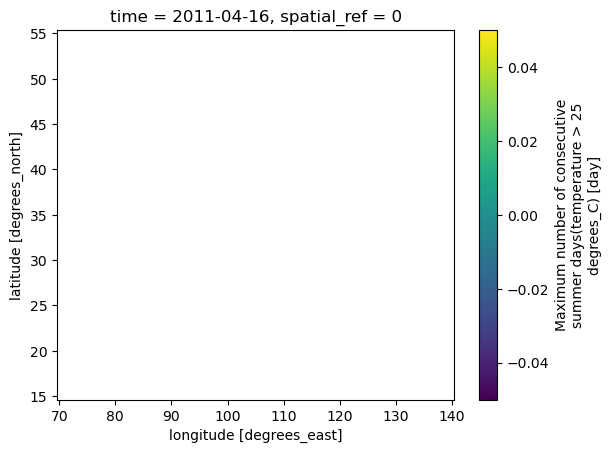

In [20]:
import xarray as xr
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# 1. Load your own dataset
precp = xr.open_dataset("download/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc")['CSU']

# 2. Update lon and lat values based on attributes
lon_start = -179.75  # Starting longitude from the dataset
lon_end = 179.75    # Ending longitude from the dataset
lon_step = 0.5       # Longitude step size from the dataset

lat_start = -89.75   # Starting latitude from the dataset
lat_end = 89.75     # Ending latitude from the dataset
lat_step = 0.5       # Latitude step size from the dataset

precp = precp.interp(lon=np.arange(69.75,140.26,0.25),lat=np.arange(14.75,55.26,0.25))

# 3. Update CRS if needed
precp.rio.write_crs("epsg:4326", inplace=True)

# 4. Update spatial dimensions if needed
precp.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

# 5. Read and represent the geometry of your shapefile
shp = gpd.read_file("/home/mohamed/Documents/I-CISK/Meteo_data_Spain_Andalucia-main/Andalucia_regions/13_23_DemarcacionCEPS.shp")

# 6. Clip the data to the shapefile
cliped = precp.rio.clip(shp.geometry.apply(mapping), shp.crs, drop=False)
cliped[0].plot()

# Show the plot
plt.show()


Working with all bands in the netcdf

In [3]:
# Working with all bands in the netcdf
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import mapping

# 1. Load your own dataset
precp = xr.open_dataset("netcdf/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc")['CSU']

# 2. Update CRS if needed
precp.rio.write_crs("epsg:4326", inplace=True)

# 3. Update spatial dimensions if needed
precp.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

# 4. Read and represent the geometry of your shapefile
#shp = gpd.read_file("/home/mohamed/Documents/I-CISK/Meteo_data_Spain_Andalucia-main/Andalucia/Andalu_dis.shp")
shp = gpd.read_file("/home/mohamed/Downloads/andalucia_buffer8k/andalu_buff14k.shp")

# 5. Clip the data to the shapefile
cliped = precp.rio.clip(shp.geometry.apply(mapping), shp.crs, drop=False)

# Save the clipped data to a NetCDF file
cliped.to_netcdf("clipped_buff14.nc")


In [4]:
import xarray as xr
import plotly.express as px

# Open the NetCDF file
nc_file = '/home/mohamed/Documents/I-CISK/netcdf/CSU_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc'
ds = xr.open_dataset(nc_file)

# Extract the variable of interest
con_sum = ds['CSU']
con_sum_avg = con_sum.mean(dim=['lat', 'lon'])
df = con_sum_avg.to_dataframe(name='Average Max Summer Days')
df = df.reset_index()

fig = px.line(df, x='time', y='Average Max Summer Days', markers=True, title='Average Maximum Number of Consecutive Summer Days Over Time')

fig.show()
ds.close()